<a href="https://colab.research.google.com/github/jtneumann/GHwithNLP-SA_LP/blob/master/GH_week_3_attempt_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


if connected shou read:
Found GPU at: /device:GPU:0

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My\ Drive/Colab Notebooks/data

/content/drive/My Drive/Colab Notebooks/data


In [0]:
from collections import Counter

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
import altair as alt
import numpy as np
import pandas as pd

In [0]:
df1 = pd.read_csv("processed/dictionary_based_sentiment_and_ratings.csv")

In [0]:
df1.head()

,ratings,reviews,review_dict_based_sent,sentiment_values,ratings_classes
0,[1.0],Yet another garbage CoD game. Zombies is unpla...,-0.008081,Neutral,Negative
1,[1.0],$80? .... No way. This is NOT worth $80. $80?....,0.033333,Neutral,Negative
2,[1.0],One of the worst games ever. I bought and down...,-0.154938,Neutral,Negative
3,[1.0],I did a lot of homework before I decided to by...,0.039000,Neutral,Negative
4,[1.0],"I am really into RPG games, I loved Skyrim, Bo...",-0.161413,Neutral,Negative


In [0]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [0]:
encoder = LabelEncoder()
sentiment_values = df1["sentiment_values"]
sentiment_values_encoded = encoder.fit_transform(sentiment_values)
sentiment_values_encoded

array([1, 1, 1, ..., 2, 2, 2])

In [0]:
oneHotencoder = OneHotEncoder()
sentiment_values_1hot = oneHotencoder.fit_transform(sentiment_values_encoded.reshape(-1,1))
sentiment_values_1hot

<4500x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4500 stored elements in Compressed Sparse Row format>

In [0]:
encoder = LabelEncoder()
ratings_classes = df1["ratings_classes"]
ratings_classes_encoded = encoder.fit_transform(ratings_classes)
ratings_classes_encoded

array([0, 0, 0, ..., 2, 2, 2])

In [0]:
oneHotencoder = OneHotEncoder()
ratings_classes_1hot = oneHotencoder.fit_transform(ratings_classes_encoded.reshape(-1,1))
ratings_classes_1hot

<4500x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4500 stored elements in Compressed Sparse Row format>

In [0]:
y_true = sentiment_values_1hot
y_scores = ratings_classes_1hot
accuracy_score(y_true, y_scores)

0.4288888888888889

In [0]:
accuracy_score(y_true, y_scores, normalize=False)

1930

In [0]:
y_pred = ratings_classes_1hot
precision_score(y_true, y_pred, average='weighted')

0.8273342222222222

In [0]:
y_true = sentiment_values_1hot
y_pred = ratings_classes_1hot
cf_matrix = multilabel_confusion_matrix(y_true, y_pred)
print(cf_matrix)

[[[2975 1393]
  [  25  107]]

 [[ 559  107]
  [2441 1393]]

 [[2896 1070]
  [ 104  430]]]


In [0]:
cf1_matrix = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1), labels=[0,1,2])
print(cf1_matrix)

[[ 107   20    5]
 [1376 1393 1065]
 [  17   87  430]]


accuracy = ( 107 + 1393 + 430) / (107+20+5+1376+1393+1065+17+87+430)
42.8%

In [0]:
recall_score(y_true, y_pred, average='samples')

0.4288888888888889

In [0]:
cf_matrix = multilabel_confusion_matrix(y_true, y_pred, labels=['Positive','Negative', 'Neutral'])
print(cf_matrix)

[[[2896  104]
  [1070  430]]

 [[2975   25]
  [1393  107]]

 [[ 559 2441]
  [ 107 1393]]]


In [0]:
cf_matrix[2]

array([[ 559, 2441],
       [ 107, 1393]])

In [0]:
recall_score(y_true, y_pred, average=None)

array([0.07133333, 0.92866667, 0.28666667])

In [0]:
recall_score(y_true, y_pred, average='weighted')

0.4288888888888889

In [0]:
recall_score(y_true, y_pred, average='micro')

0.4288888888888889

In [0]:
import sys
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix[0].flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix[0].flatten()/np.sum(cf_matrix[0])]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

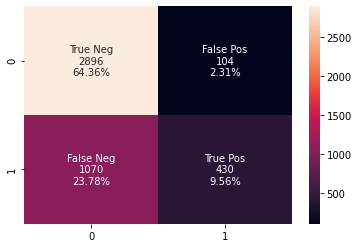

In [0]:
sns.heatmap(cf_matrix[0], annot=labels, fmt='')

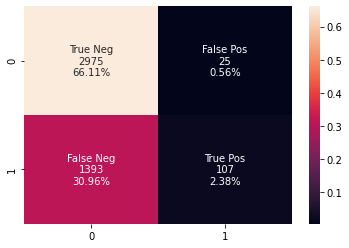

In [0]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix[1].flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix[1].flatten()/np.sum(cf_matrix[1])]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix[1]/np.sum(cf_matrix[1]), annot=labels, fmt='')

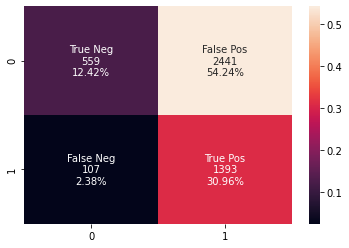

In [0]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix[2].flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix[2].flatten()/np.sum(cf_matrix[2])]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix[2]/np.sum(cf_matrix[2]), annot=labels, fmt='')

In [0]:
source = pd.DataFrame({
    'x': cf_matrix[0].ravel(),
    'y': cf_matrix[0].ravel(),
    'z': cf_matrix[0].ravel()
})

alt.Chart(source).mark_rect().encode(
    x=('x:O'),
    y=('y:O'),
    color='z:Q'
)

alt.Chart(...)